In [35]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
import wordcloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

In [36]:
### Hannanum 사용

# Load Dataset

In [37]:
df = pd.read_csv('data/ENFJ.csv')
df.head()

Unnamed: 0  num                      title                          content
0           1    5                   사랑해요 엔프제           천사가 있다면 당신일 것         
1           2    6                         ㅎㅇ                       너희들 다 내 거임
2           3    7                 엔프제 갤러리 특)           엔프제는 없고엔프제를 보려는 관객만 있다
3           4    8  갤주는 갤이름 대문자로 바꿔라. ㅈㄴ 불편하네                              NaN
4           5    9                       ㅎㅇㅎㅇ                        엔갤 흥하길 바람

# Remove Empty Spaces

In [38]:
 # 좌우 공백 제거
df['title'] = df['title'].str.strip() 
df['content'] = df['content'].str.strip()
 # 단어 사이의 공백 제거
df['title'].replace('',np.nan, inplace=True) 
df['content'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

Unnamed: 0  num       title                 content
0           1    5    사랑해요 엔프제           천사가 있다면 당신일 것
1           2    6          ㅎㅇ              너희들 다 내 거임
2           3    7  엔프제 갤러리 특)  엔프제는 없고엔프제를 보려는 관객만 있다
4           5    9        ㅎㅇㅎㅇ               엔갤 흥하길 바람
5           6   12  엔프제 노무 부러워              니네 성격 나줘ㅡㅡ

# Extract Nouns

In [39]:
extractor = Hannanum() # 명사만 추출하는 엔진

nouns = []

for i, row in tqdm(df.iterrows()):
    _, num, title, content = row

    if title and type(title) is str:
        nouns.extend(extractor.nouns(title))
    if content and type(content) is str:
        nouns.extend(extractor.nouns(content))

703it [00:15, 46.63it/s]


# Count Same Words

In [51]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'나': 758, '사람': 447, '것': 409, '엔프제': 312, '생각': 229, '말': 181, '때': 165, '수': 154, '내': 144, '친구': 129, '진짜': 106, '성격': 102, '데': 97, '일': 89, '뭐': 80, '근데': 79, '너': 75, '사람들': 75, '얘': 73, '친구들': 72, '마음': 70, '여자': 69, '사랑': 66, '글': 64, '이': 59, '자기': 52, '지': 51, '적': 50, '이야기': 49, '대화': 47, '엔프제들': 47, '상처': 47, '유형': 46, '주변': 46, '라': 46, '애': 44, '기분': 44, '관계': 44, '우리': 44, '들': 43, '중': 42, '편': 41, '남': 41, '남자': 41, '거': 40, '상대': 36, '등': 36, '그': 35, '오늘': 35, '하나': 35, '한번': 35, '듯': 35, '행복': 35, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '저': 30, '뭔가': 30, '존': 30, '다들': 30, '감정': 30, '누구': 30, '전': 29, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '속': 28, '상대방': 28, '줄': 28, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '눈': 26, '시간': 25, '앞': 25, '비슷': 24, '칭찬': 24, '이유': 24, '예전': 24, '집': 23, '진심': 22, '얘기': 22, '평소': 22, '세상': 22, '부분': 21, '인생': 21, '관심': 21, '서로': 21, '갤': 20, 'ㅋㅋㅋㅋㅋ': 20, 'ㅋㅋ': 20

# Remove Minority
- Remove the word length is 1
- Remove the word frequency is 1

In [52]:
for word in list(words.keys()):
    if len(word) == 1 :
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]

print(words)

{'사람': 447, '엔프제': 312, '생각': 229, '친구': 129, '진짜': 106, '성격': 102, '근데': 79, '사람들': 75, '친구들': 72, '마음': 70, '여자': 69, '사랑': 66, '자기': 52, '이야기': 49, '대화': 47, '엔프제들': 47, '상처': 47, '유형': 46, '주변': 46, '기분': 44, '관계': 44, '우리': 44, '남자': 41, '상대': 36, '오늘': 35, '하나': 35, '한번': 35, '행복': 35, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '뭔가': 30, '다들': 30, '감정': 30, '누구': 30, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '상대방': 28, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '시간': 25, '비슷': 24, '칭찬': 24, '이유': 24, '예전': 24, '진심': 22, '얘기': 22, '평소': 22, '세상': 22, '부분': 21, '인생': 21, '관심': 21, '서로': 21, 'ㅋㅋㅋㅋㅋ': 20, 'ㅋㅋ': 20, '너희': 20, '모습': 19, '호감': 19, '공감': 19, '지금': 19, '계획': 19, '분위기': 19, '사이': 19, '인프피': 18, '문제': 18, '선물': 18, '그때': 18, '마스크': 18, '인간': 17, '궁합': 17, '노력': 17, '인팁': 17, '질문': 17, '그것': 17, 'ㅋㅋㅋ': 17, '엄마': 17, '그녀': 17, '인프제': 16, '필요': 16, '소리': 16, '1.': 16, '술자리': 16, 'ㅠㅠ': 15, '미안': 15, '우울': 15, '완전'

In [42]:
wordcloud.__version__

'1.8.2.2'

In [43]:
# words = {
#     '나' : 10,
#     '사람' : 5
# }

In [53]:
wc = wordcloud.WordCloud()
wc

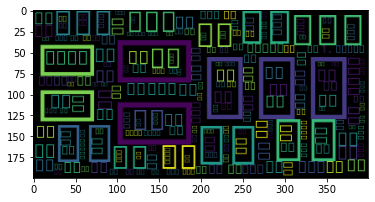

In [54]:
cloud = wc.generate_from_frequencies(words)
plt.imshow(cloud)
plt.show()

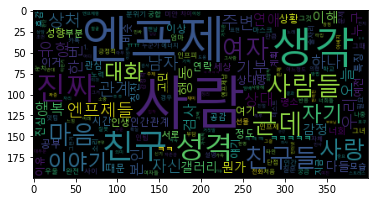

In [55]:
wc = wordcloud.WordCloud(font_path='C:/Windows/Fonts/malgun.ttf')

cloud = wc.generate_from_frequencies(words)
plt.imshow(cloud)
plt.show()

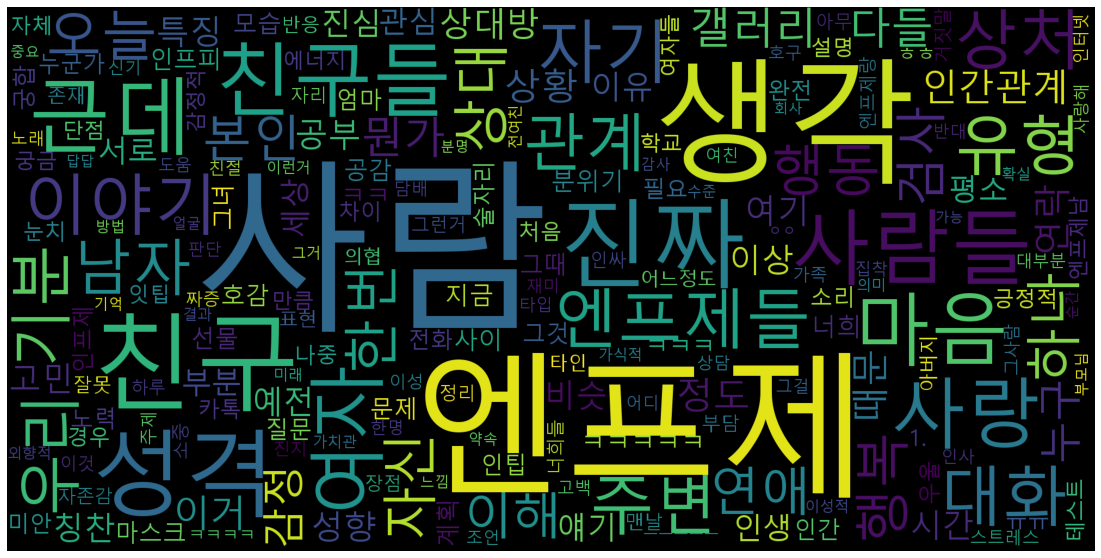

In [56]:
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()